In [11]:
#DataFrame 
import re
import pandas as pd 
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import seaborn as sns
import gensim
import string 
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#df_test = pd.read_csv('test.csv' , encoding='latin-1')
df_newset = pd.read_csv('newsdata.csv' , encoding='latin-1')
df_newset_theguardian = pd.read_csv('news_the_guardian.csv' , encoding='latin-1')
df_title_ns = df_newset['content'].to_frame()
df_title_thg = df_newset_theguardian['content'].to_frame()
df_title_ns.rename(columns={"content": "title"} , inplace = True)
df_title_thg.rename(columns={"content": "title"} , inplace = True)
df_title_thg.dropna(inplace=True)
df_title_ns.dropna(inplace=True)
frames = [df_title_thg, df_title_ns]
df_title = pd.concat(frames)


df_title
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()



In [12]:
new_en_stop = ['23',"a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder","13","4",'1','â','2019','50','it']

In [13]:
#numero_topic
def LDA(df_title):
    
    df_title.replace({'U.S.':'USA '} , regex=True , inplace = True)
    df_title.replace({'Trumps':'Trump'} , regex=True , inplace = True)#{'A': 'new'}, regex=True
    #Convierte a minusculas cada elemento de cada lista 
    lista_lr =[] 
    for rows in df_title.title:
        my_list = [rows.lower()]
        lista_lr.append(my_list)
    
    tokenizer = RegexpTokenizer(r'\w+')
    
    #Tokens de cada lista 
    
    flat_list = [item for sublist in lista_lr for item in sublist]
    list_token = []
    for sentence in flat_list:
        list_token.append(tokenizer.tokenize(sentence))
        
    ##Eliminando las stop words  
    #en_stop = get_stop_words('en')
    stopped_tokens = []
    temp = []
    for i in list_token:
        for j in i:
            if not j in new_en_stop:
                temp.append(j)
        stopped_tokens.append(temp)
        temp = []
    #####Eliminando las stop words 
    text = []
    tempo = []
    
    p_stemmer = PorterStemmer()
    for item in stopped_tokens:
        for l in item:
            st = p_stemmer.stem(l)
            tempo.append(st)
        text.append(tempo)
        tempo = []
        
    ###Dicionarios de las lstas y ocurrencias
    dictionary = corpora.Dictionary(text)
    corpus = [dictionary.doc2bow(text) for text in text]
    
    num_topics = 10
    ldamodel_r = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=5)
    # return print(ldamodel.print_topics(num_topics=numero_topic, num_words=3))
    return ldamodel_r, dictionary

In [31]:
modelo_news, dicc = LDA(df_title)
final_list = modelo_news.show_topics(num_words=9, num_topics = 10)
final_list

[(0,
  '0.009*"year" + 0.005*"wework" + 0.005*"peopl" + 0.005*"septemb" + 0.005*"compani" + 0.004*"film" + 0.004*"pa" + 0.003*"school" + 0.003*"london"'),
 (1,
  '0.010*"day" + 0.008*"gener" + 0.007*"turkey" + 0.006*"year" + 0.005*"electr" + 0.005*"renew" + 0.005*"report" + 0.004*"state" + 0.004*"turkish"'),
 (2,
  '0.007*"peopl" + 0.006*"year" + 0.005*"climat" + 0.005*"compani" + 0.005*"day" + 0.004*"ga" + 0.004*"fuel" + 0.004*"student" + 0.003*"fossil"'),
 (3,
  '0.009*"year" + 0.006*"time" + 0.006*"hour" + 0.004*"target" + 0.004*"plastic" + 0.004*"work" + 0.004*"peopl" + 0.004*"drug" + 0.003*"worker"'),
 (4,
  '0.012*"protest" + 0.011*"polic" + 0.011*"hong" + 0.010*"kong" + 0.006*"trump" + 0.006*"presid" + 0.006*"ukrain" + 0.006*"peopl" + 0.005*"brick"'),
 (5,
  '0.006*"jame" + 0.006*"bloom" + 0.005*"china" + 0.005*"tweet" + 0.004*"time" + 0.004*"googl" + 0.004*"situat" + 0.004*"peopl" + 0.004*"player"'),
 (6,
  '0.014*"turkey" + 0.011*"syria" + 0.010*"syrian" + 0.010*"turkish" + 0.

In [32]:
def grp_wds(lista_):
    prueba = str(lista_)
    x = re.findall("0.0..", prueba)
    y = re.findall("[a-z]+", prueba)
    d = {'words':y,'Prob':x}
    grp = pd.DataFrame(d)
    grp["Prob"] = grp["Prob"].astype("float")
    barras = ax = sns.barplot(x = grp["words"], y =grp["Prob"], palette = 'hls', capsize = 0.05,saturation = 4,             
            errcolor = 'black')
    return barras

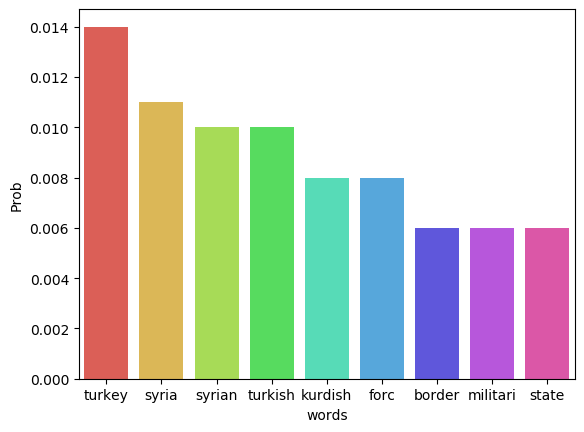

In [36]:
grp_wds(final_list[6])

In [34]:
def grp_nuevo_texto(texto):
    raw = texto.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in new_en_stop]
    texts_nuevo = [p_stemmer.stem(i) for i in stopped_tokens]
    tupla = modelo_news[dicc.doc2bow(texts_nuevo)]
    data = {'Pretenencia':[tupla[0][0],tupla[1][0],tupla[2][0]], 'Proba':[tupla[0][1],tupla[1][1],tupla[2][1]]}
    df_per = pd.DataFrame(data)
    return plt.bar(df_per['Pretenencia'].astype(str), df_per["Proba"])

<BarContainer object of 3 artists>

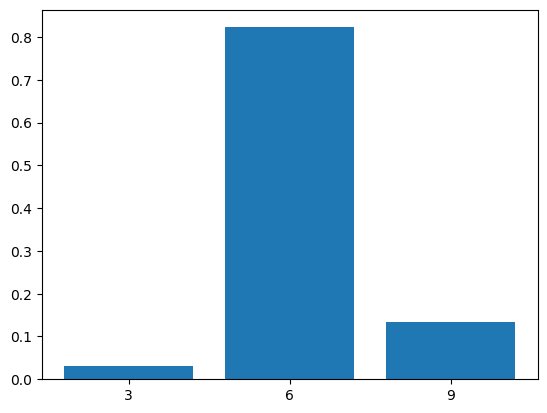

In [35]:
grp_nuevo_texto('Donald Trump has hailed his decision to withdraw US troops in Syria, paving way for a Turkish offensive, as strategically brilliant, declaring that the Kurds he had abandoned were much safer now and were anyway not angels The presidents remarks contradicted the official assessment of both the state and defence departments that the Turkish offensive was a disaster for regional stability and the fight against Isis.It also undercut a mission to Ankara by the US vice-president, Mike Pence, and the secretary of state, Mike Pompeo, aimed at persuading Turkeys president, Recep Tayyip Erdoğan, to halt the offensive or face US sanctions')